## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
import tensorflow as tf
from keras.layers import Convolution2D,MaxPooling2D
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
print("total samples are",x_train.shape[0], y_train.shape[0], x_test.shape[0],y_test.shape[0])

total samples are 60000 60000 10000 10000


### Find dimensions of an image in the dataset

In [4]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)


In [6]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)



### Import the necessary layers from keras to build the model

In [9]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [0]:
from keras.layers import Convolution2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.models import Sequential


### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [11]:
model=Sequential()
# First conv layer
model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model.add(Activation('relu'))
#second conv layer
model.add(Convolution2D(32,3,3,))
model.add(Activation('relu'))

#fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stops=keras.callbacks.EarlyStopping(patience=5)

call_backs=[early_stops]

model.fit(x_train,y_train,batch_size=32,nb_epoch=10,validation_data=(x_test, y_test), callbacks=call_backs)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.3738 - acc: 0.8655 - val_loss: 0.2940 - val_acc: 0.8947
Epoch 2/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2284 - acc: 0.9159 - val_loss: 0.2555 - val_acc: 0.9065
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.1619 - acc: 0.9391 - val_loss: 0.2576 - val_acc: 0.9129
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1090 - acc: 0.9596 - val_loss: 0.2885 - val_acc: 0.9109
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0746 - acc: 0.9722 - val_loss: 0.3357 - val_acc: 0.9082
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0486 - acc: 0.9824 - val_loss: 0.3430 - val_acc: 0.9131
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0346 - acc: 0.9875 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
model2=Sequential()
# First conv layer
model2.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model2.add(Activation('relu'))
#second conv layer
model2.add(Convolution2D(32,3,3,))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

#fully connected layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))


model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stops=keras.callbacks.EarlyStopping(patience=5)

call_backs=[early_stops]

model2.fit(x_train,y_train,batch_size=32,nb_epoch=10,validation_data=(x_test, y_test), callbacks=call_backs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.3897 - acc: 0.8591 - val_loss: 0.3061 - val_acc: 0.8863
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2585 - acc: 0.9047 - val_loss: 0.2579 - val_acc: 0.9058
Epoch 3/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2136 - acc: 0.9209 - val_loss: 0.2391 - val_acc: 0.9125
Epoch 4/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.1763 - acc: 0.9340 - val_loss: 0.2314 - val_acc: 0.9173
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1511 - acc: 0.9432 - val_loss: 0.2221 - val_acc: 0.9198
Epoch 6/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.1284 - acc: 0.9515 - val_loss: 0.2591 - val_acc: 0.9109
Epoch 7/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1092 - acc: 0.9586 - val_loss: 0.2544 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

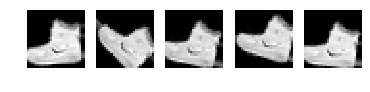

In [26]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [29]:
model2.fit_generator(datagen.flow(x_train,y_train,batch_size=32),samples_per_epoch=x_train.shape[0],nb_epoch=10,validation_data=(x_test, y_test),callbacks=call_backs)

Epoch 1/10
  18/1875 [..............................] - ETA: 18s - loss: 0.4533 - acc: 0.8351

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  """Entry point for launching an IPython kernel.


1875/1875 [==============================] - 18s 10ms/step - loss: 0.4785 - acc: 0.8218 - val_loss: 0.3153 - val_acc: 0.8893
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4534 - acc: 0.8319 - val_loss: 0.3247 - val_acc: 0.8876
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4271 - acc: 0.8432 - val_loss: 0.3097 - val_acc: 0.8937
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4137 - acc: 0.8461 - val_loss: 0.3325 - val_acc: 0.8852
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3979 - acc: 0.8532 - val_loss: 0.3247 - val_acc: 0.8888
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3907 - acc: 0.8567 - val_loss: 0.3081 - val_acc: 0.8898
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3808 - acc: 0.8595 - val_loss: 0.2893 - val_acc: 0.8991
Epoch 8/10
1875/1875 [==============================] - 18s



```
`# This is formatted as code`
```

###  Report the final train and validation accuracy

In [36]:
model2.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 53us/step


[0.29606577682495117, 0.8967]